In [1]:
import os
import warnings
from pathlib import Path

warnings.simplefilter(action="ignore", category=FutureWarning)
import matplotlib as mpl
import mplscience
import numpy as np
import pandas as pd
import seaborn as sns
import yaml
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix
import mplscience

mplscience.set_style()
%load_ext autoreload
%autoreload 2

In [2]:
output = Path(
    "/lustre/groups/ml01/workspace/moscot_paper/mapping/results"
)
results = []
for file in os.listdir(output):
    l = file.split(",")
    params = {}
    if (output / file / "results.csv").is_file():
        for i in l:
            k, v = i.split("=")
            params.update({k: v})
        df = pd.DataFrame(params, index=[0])
        res = pd.read_csv(output / file / "results.csv", index_col=0)
        df = pd.concat([df, res], axis=1)
        results.append(df)
out = pd.concat(results)
out

,launcher,moscot.alpha,moscot.gamma,moscot.initializer,moscot.rank,moscot.sc_attr,moscot.tau_a,time,corr_results_mean_pearson,corr_results_median_pearson,corr_results_var_pearson,corr_results_max_pearson,corr_results_min_pearson,corr_results_mean_spearman,corr_results_median_spearman,corr_results_var_spearman,corr_results_max_spearman,corr_results_min_spearman,wd_Endothelial cells_CD38,wd_Kupffer cells_Folate
0,icb,0.3,10,k-means,500,X_pca_cite,1,0 days 09:11:16.360307,0.181747,0.125017,0.034712,0.747401,-0.139018,0.141143,0.110771,0.020347,0.644074,-0.160262,0.235893,0.442779
0,icb,0.3,10,random,300,X_pca,0.2,0 days 10:29:18.900518,0.152097,0.108362,0.057715,0.656846,-0.295805,0.094973,0.096333,0.035356,0.612605,-0.367597,0.703708,1.594701
0,icb,0.3,10,rank2,300,X_pca,0.2,0 days 04:33:54.475322,0.153624,0.107072,0.056831,0.657764,-0.289650,0.099262,0.105340,0.035264,0.621287,-0.362714,0.707474,1.614181
0,icb,0.3,10,rank2,300,X_pca_cite,0.2,0 days 10:22:36.924743,0.166927,0.098994,0.050486,0.687491,-0.304193,0.109722,0.089744,0.024811,0.664598,-0.256052,0.586935,1.416033
0,icb,0.3,10,random,300,X_pca_cite,0.1,0 days 11:03:44.060910,0.104742,0.059282,0.025667,0.445495,-0.255640,0.111771,0.088998,0.017944,0.592209,-0.195319,0.685694,4.919310
0,icb,0.3,10,rank2,300,X_pca_cite,0.1,0 days 04:29:32.811681,0.105232,0.059708,0.025862,0.444267,-0.255793,0.118248,0.097584,0.017745,0.604507,-0.180624,0.651257,4.262298
0,icb,0.3,10,random,300,X_pca_cite,1,0 days 09:47:54.178006,0.176403,0.113254,0.034876,0.747215,-0.148476,0.133760,0.103159,0.021881,0.639609,-0.194062,0.236967,0.439936
0,icb,0.3,10,k-means,300,X_pca,1,0 days 15:29:40.457597,0.166787,0.130277,0.045525,0.757294,-0.236406,0.113169,0.098050,0.030526,0.635563,-0.322278,0.239946,0.454706
0,icb,0.3,10,rank2,500,X_pca_cite,1,0 days 09:01:32.887935,0.183156,0.121251,0.034811,0.747348,-0.139860,0.148060,0.117961,0.019669,0.646056,-0.153735,0.239943,0.441894
0,icb,0.3,10,random,300,X_pca,0.1,0 days 11:25:39.167862,0.100502,0.068864,0.026444,0.456092,-0.224251,0.086173,0.104327,0.033914,0.508380,-0.397766,0.924757,8.257936


In [3]:
out["time"]

0    0 days 09:11:16.360307
0    0 days 10:29:18.900518
0    0 days 04:33:54.475322
0    0 days 10:22:36.924743
0    0 days 11:03:44.060910
0    0 days 04:29:32.811681
0    0 days 09:47:54.178006
0    0 days 15:29:40.457597
0    0 days 09:01:32.887935
0    0 days 11:25:39.167862
0    0 days 10:18:01.975096
0    0 days 10:30:54.661088
0    0 days 04:34:17.549354
0    0 days 09:44:47.841407
0    0 days 10:21:31.753418
0    0 days 13:34:51.521010
0    0 days 14:50:24.176471
0    0 days 04:26:08.510609
0    0 days 10:27:01.585634
Name: time, dtype: object

In [18]:
out.tau.unique()

array(['1', '0.2', '0.1', '0.5'], dtype=object)

In [10]:
out = out.rename(
    columns={
        "moscot.alpha": "alpha",
        "moscot.epsilon": "epsilon",
        "moscot.tau_a": "tau",
        "moscot.sc_attr": "modality",
        "corr_results_median_pearson": "median pearson",
        "corr_results_median_spearman": "median spearman",
    })
out["modality"] = out["modality"].replace({
    "X_pca_cite": "CITE-seq + RNA-seq",
    "X_pca": "RNA-seq",
})

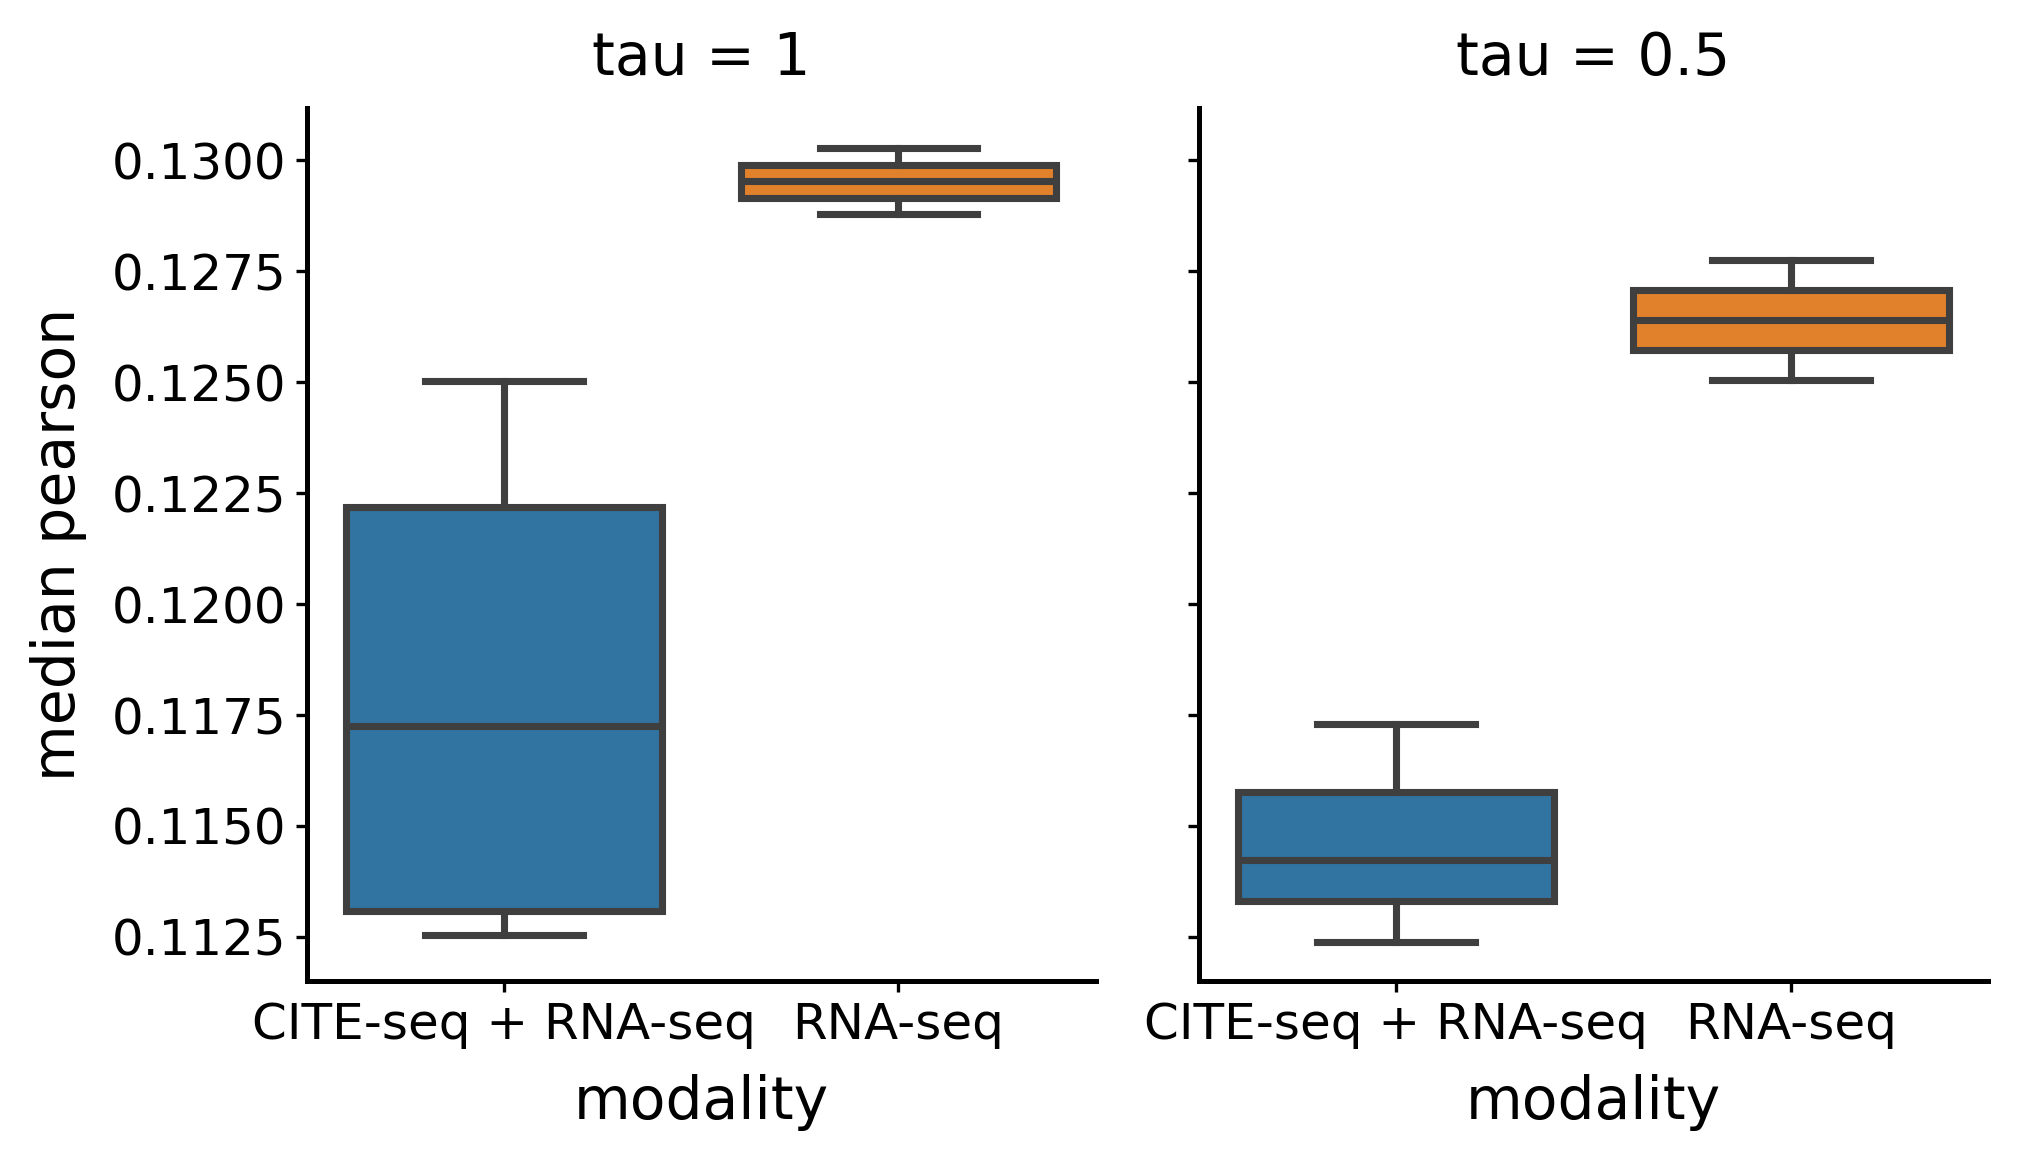

In [19]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 7, 4
rcParams['figure.dpi'] = 300
outplot = sns.catplot(
    data=out[(out["moscot.gamma"]=="10") & (out["tau"].isin(["1","0.5"]))], # (out["moscot.rank"]=="300")&
    x="modality",
    y="median pearson",
    col="tau",
    # hue="moscot.initializer",
    # s=100,
    # col_wrap=5,
    kind="box",
    height=4, aspect=6/7
)
# outplot.set_xlabels("steps", clear_inner=False)
plt.tight_layout()

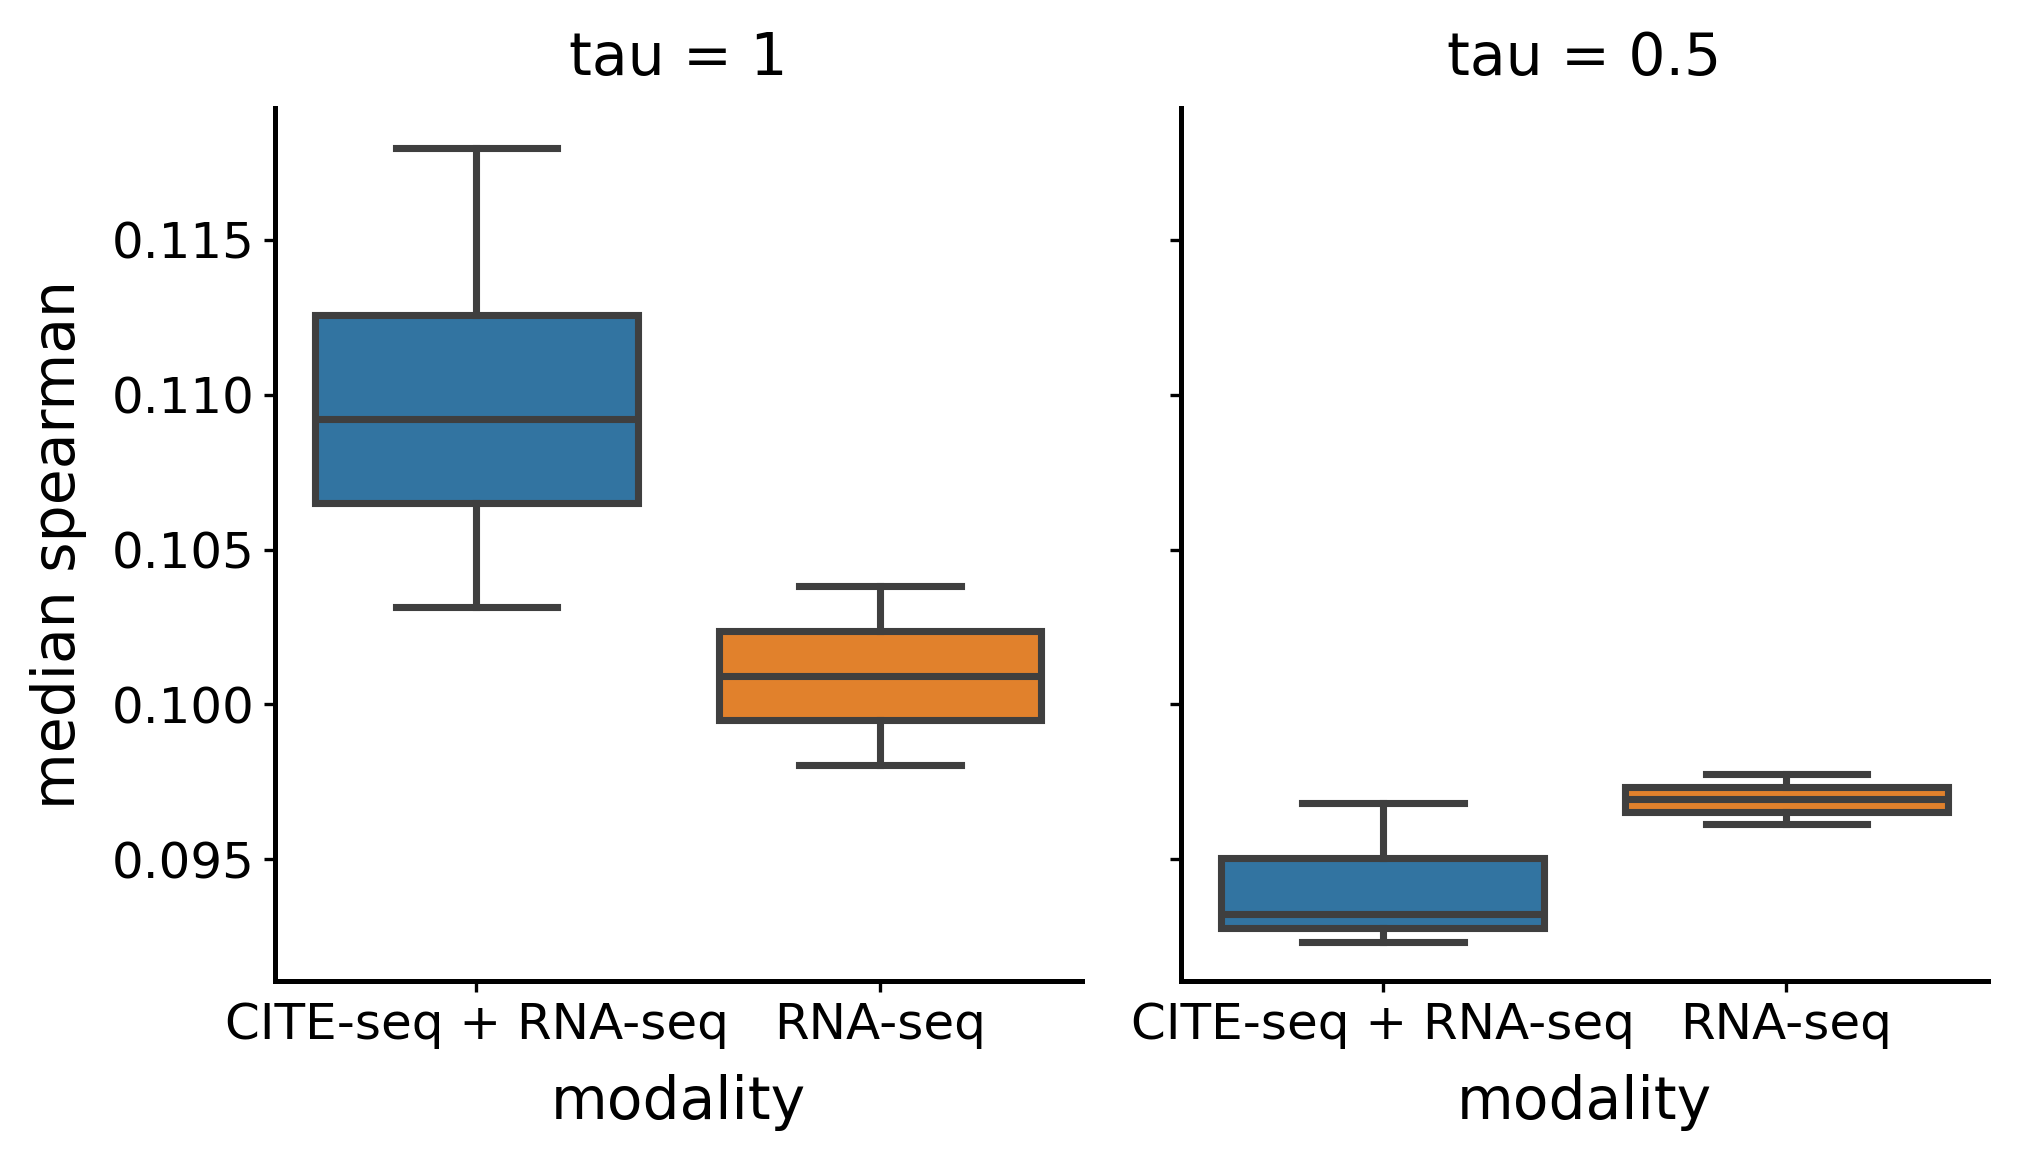

In [20]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 7, 4
rcParams['figure.dpi'] = 300
outplot = sns.catplot(
    data=out[(out["moscot.gamma"]=="10") & (out["tau"].isin(["1","0.5"]))], # (out["moscot.rank"]=="300")&
    x="modality",
    y="median spearman",
    col="tau",
    # hue="moscot.initializer",
    # s=100,
    # col_wrap=5,
    kind="box",
    height=4, aspect=6/7
)
# outplot.set_xlabels("steps", clear_inner=False)
plt.tight_layout()

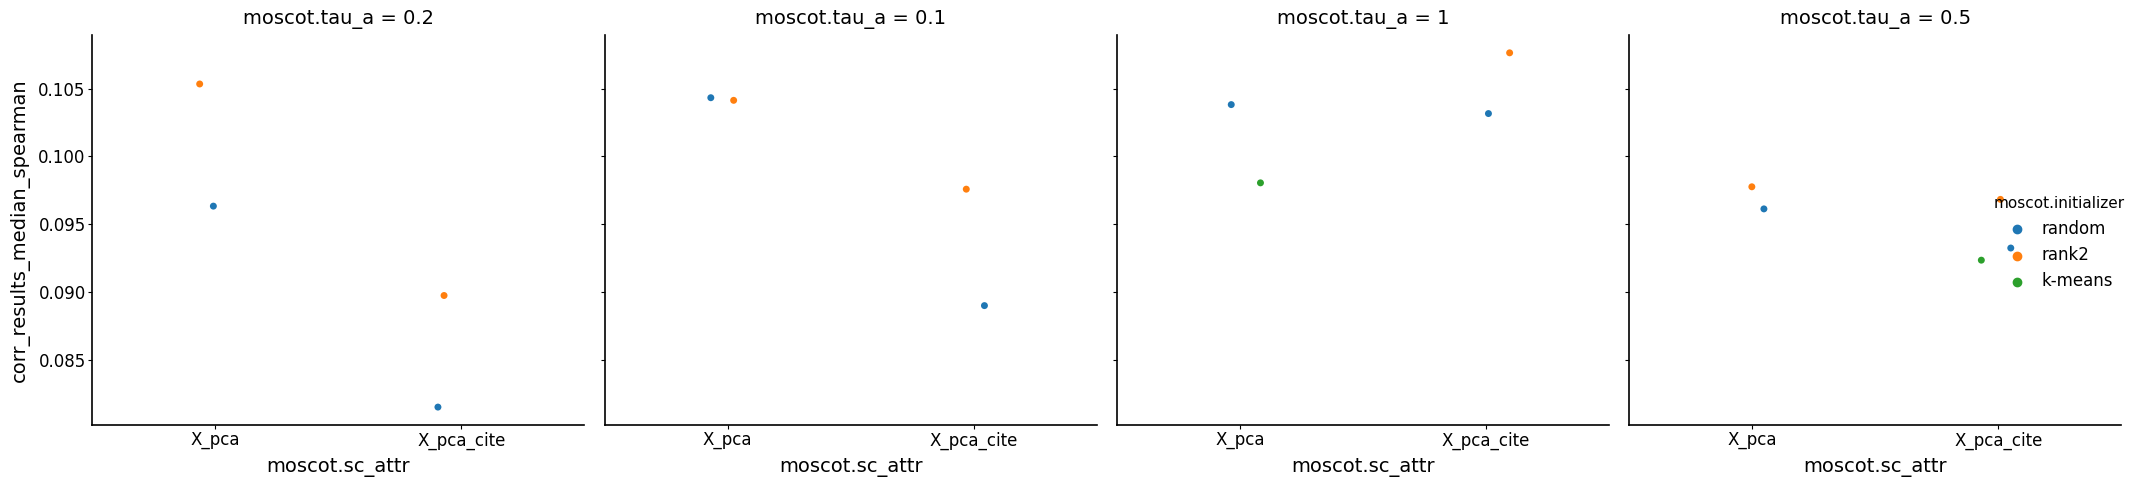

In [7]:
outplot = sns.catplot(
    data=out[(out["moscot.rank"]=="300")&(out["moscot.gamma"]=="10")],
    x="moscot.sc_attr",
    y="corr_results_median_spearman",
    col="moscot.tau_a",
    hue="moscot.initializer",
    # col_wrap=5,
    kind="strip",
)
# outplot.set_xlabels("steps", clear_inner=False)
plt.tight_layout()

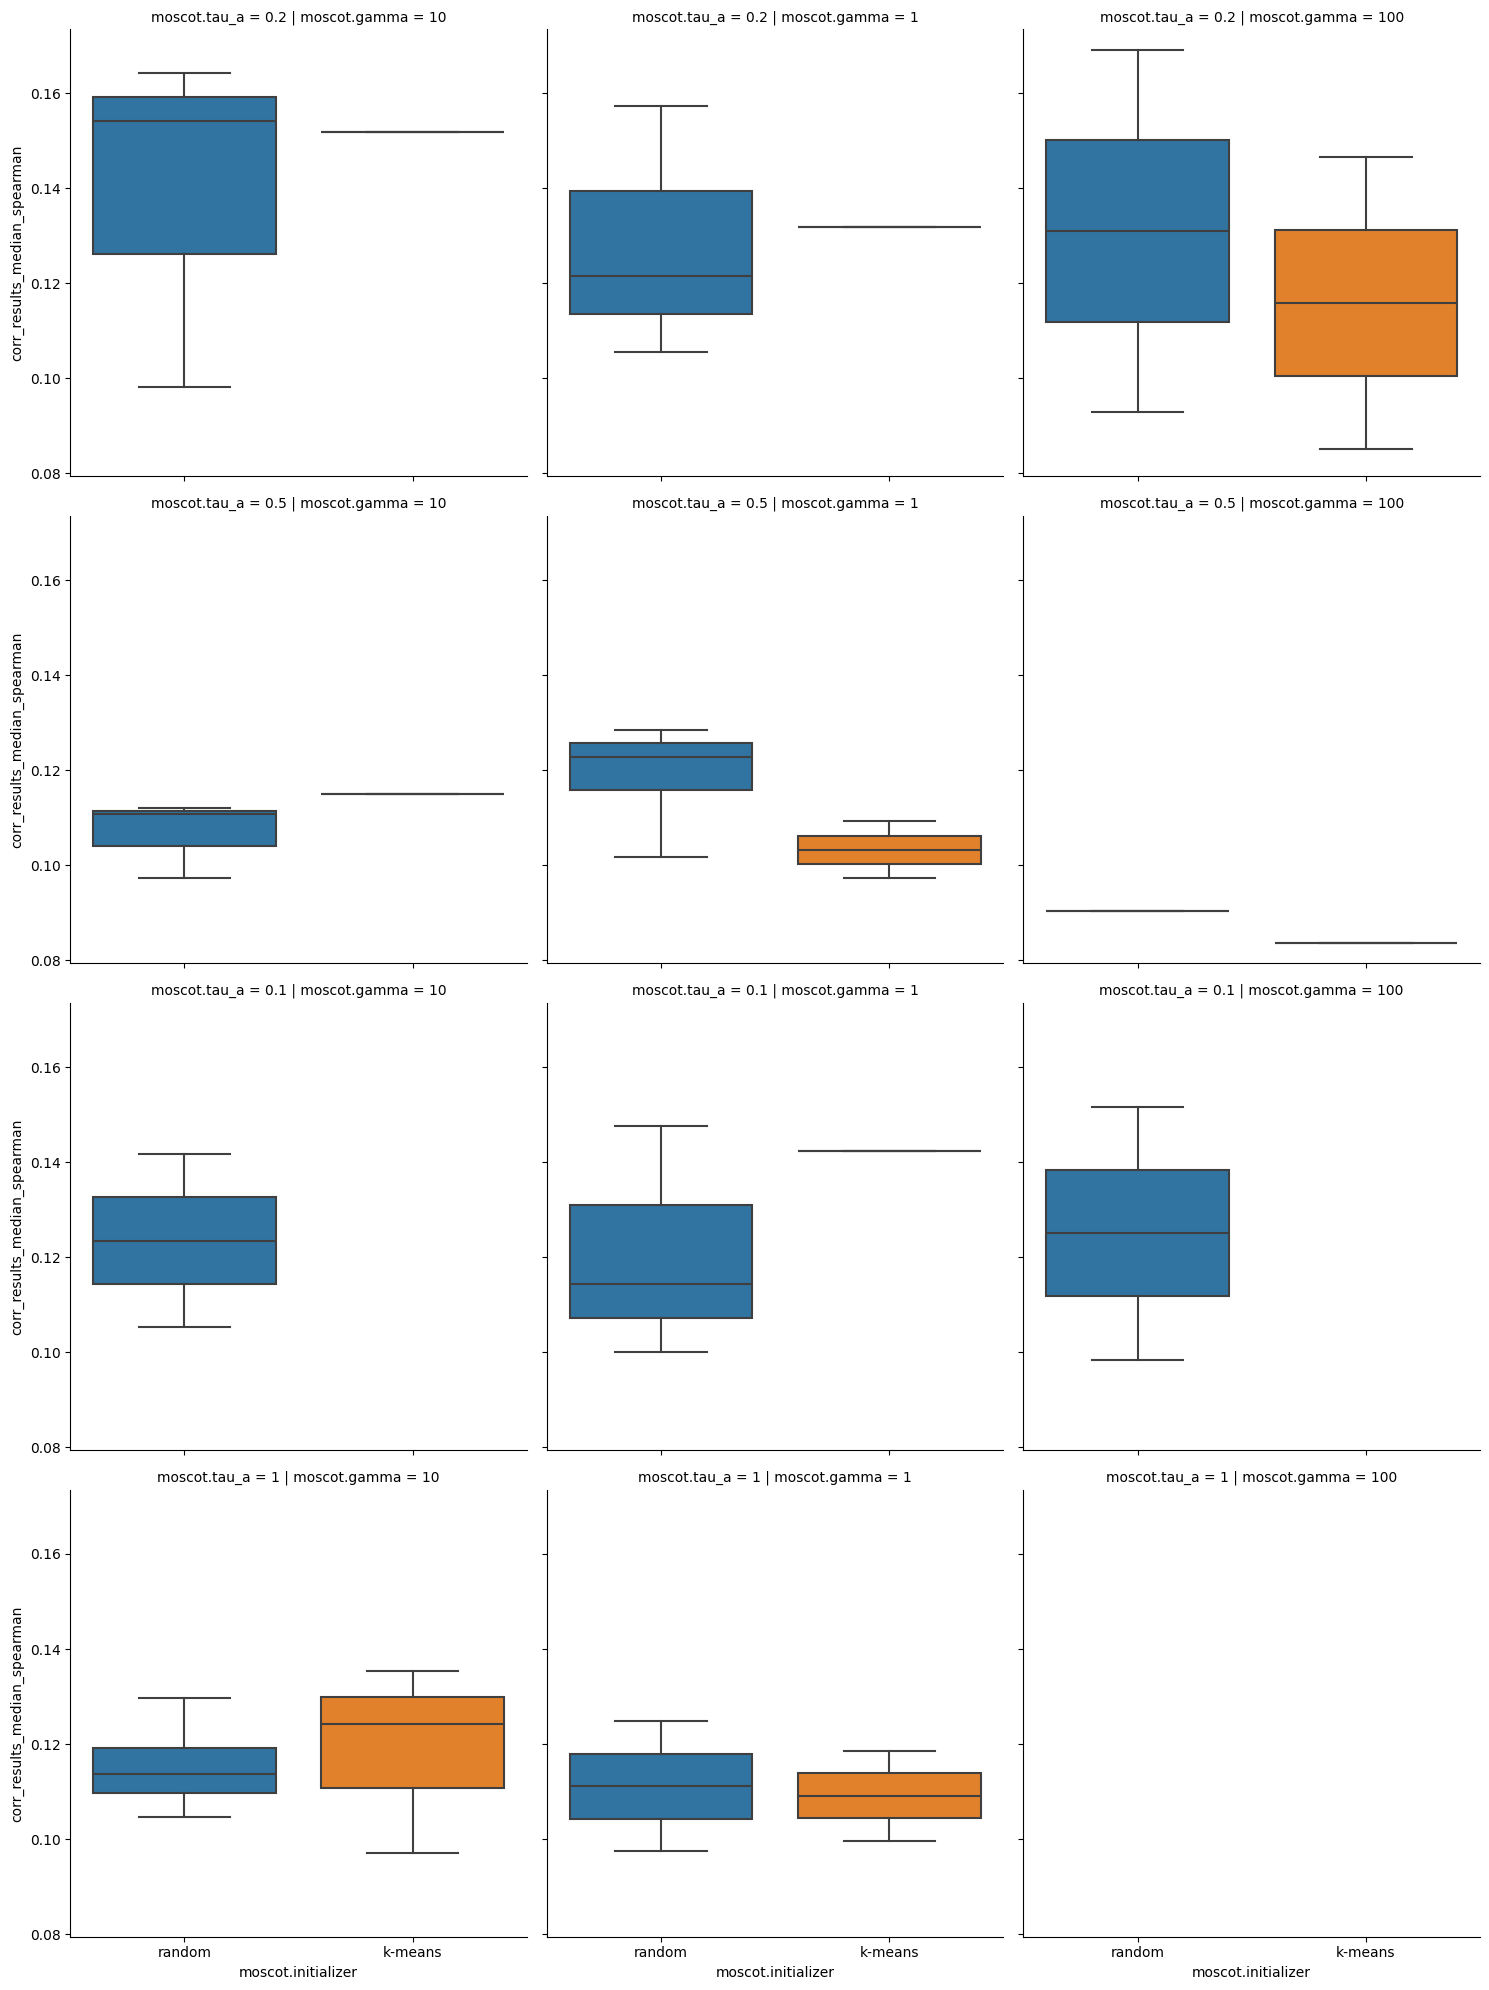

In [14]:
outplot = sns.catplot(
    data=out[out["moscot.rank"]=="300"],
    x="moscot.initializer",
    y="corr_results_median_spearman",
    col="moscot.gamma",
    row="moscot.tau_a",
    # col_wrap=5,
    kind="box",
)
# outplot.set_xlabels("steps", clear_inner=False)
plt.tight_layout()